[[2.08797437e+01 8.20027442e+01 6.50298529e+00 ... 5.83000000e+00
  1.29000000e+00 1.80000000e+01]
 [2.17704617e+01 8.03196441e+01 7.03809636e+00 ... 6.45000000e+00
  2.00000000e+00 2.98000000e+02]
 [2.30044591e+01 8.23207629e+01 7.84020714e+00 ... 6.43000000e+00
  7.40000000e-01 4.80000000e+01]
 ...
 [2.53310446e+01 8.43053379e+01 6.90424171e+00 ... 6.26000000e+00
  7.50000000e-01 2.61000000e+02]
 [2.68975017e+01 8.38924148e+01 6.46327108e+00 ... 5.57000000e+00
  1.00000000e-02 7.60000000e+01]
 [2.69860369e+01 8.94138489e+01 6.26083896e+00 ... 5.25000000e+00
  1.32000000e+00 7.90000000e+01]]
[ 6.585 22.2   41.22  ... 24.59  20.03   8.179]
X: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Prediction: [26.53531958 32.92814775 

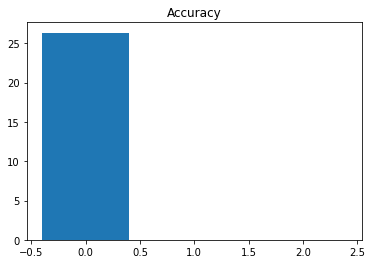

In [11]:
import pandas as pd
import numpy as np

dff = pd.read_csv("data/CropData.csv")
data = 'Mangalore'
    #input("Enter Location:")
data1 = 'Alluvial'
    #input("Enter Soil:")
data2 = 3
    #int(input("Enter Area:"))

df1 = dff[dff['Location'].str.contains(data)]
df2 = df1[df1['Soil'].str.contains(data1)]
# print("df2:",df2)

data = pd.read_csv("data/CropData.csv")
data.drop(["Location", "Soil", "Crops"], axis=1,
          inplace=True)
data.to_csv("mlr1.csv",index=False)

datasets = pd.read_csv('mlr1.csv')

X = datasets.iloc[:, :-1].values
print(X)
Y = datasets.iloc[:, 5].values
print(Y)

# Encoding categorical data

# Encoding the Independent Variable

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 4] = labelencoder_X.fit_transform(X[:, 4])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
print("X:",X)

# Avoiding the Dummy Variable Trap
X = X[:, 1:]
print(X)

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Fitting the Multiple Linear Regression in the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)


# Predicting the Test set results

Y_Pred = regressor.predict(X_Test)

print("Prediction:",Y_Pred)
print("Coeffiecient",regressor.coef_)
print("Mean squred error:%.2f"%np.mean((regressor.predict(X_Test)-Y_Test)**2))


accuracy =100 - (abs(regressor.score(X_Test,Y_Test))*100)
print(accuracy,'%')
import matplotlib.pyplot as plt
x = [0, 1, 2]
y = [accuracy, 0, 0]
plt.title('Accuracy')
plt.bar(x, y)
plt.show()